# Terrorism Middle East

In [9]:
import numpy as np
import pandas as pd
from glob import glob
import salem
from salem import get_demo_file, DataLevels, GoogleVisibleMap, Map
import matplotlib.pyplot as plt
import seaborn as sns

## Load AUC result and plot histogram

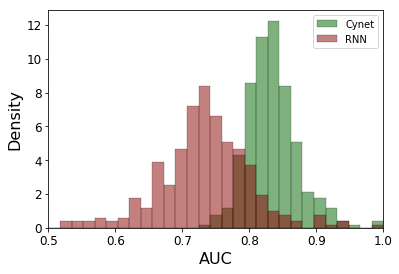

In [36]:
df = pd.read_csv('auc_cynet_rnn.csv').set_index('model_id')
df = df[(df.best_auc < .9999) & (df.best_auc > .5) & (df.rnn > .5)]

fig, ax = plt.subplots()
data = df[['best_auc', 'rnn']].values.T
methods = ['Cynet', 'RNN']
colors = ['darkgreen', 'darkred']

for l, d, c in zip(methods, data, colors):
    sns.histplot(
        d, 
        bins=np.linspace(.5, 1, 30), 
        ax=ax, 
        kde=False, 
        label=l, 
        stat="density", 
        alpha=.5, 
        color=c, 
        linewidth=.2)
ax.set_xlim([.5, 1])
ax.legend()
ax.set_xlabel('AUC', fontsize=16)
ax.set_ylabel('Density', fontsize=16)
ax.tick_params(axis='both', labelsize=12)

## Plot Cynet AUCs on a Google map background

x range = [0.0, 84.0], y range = [-4.0, 49.0]


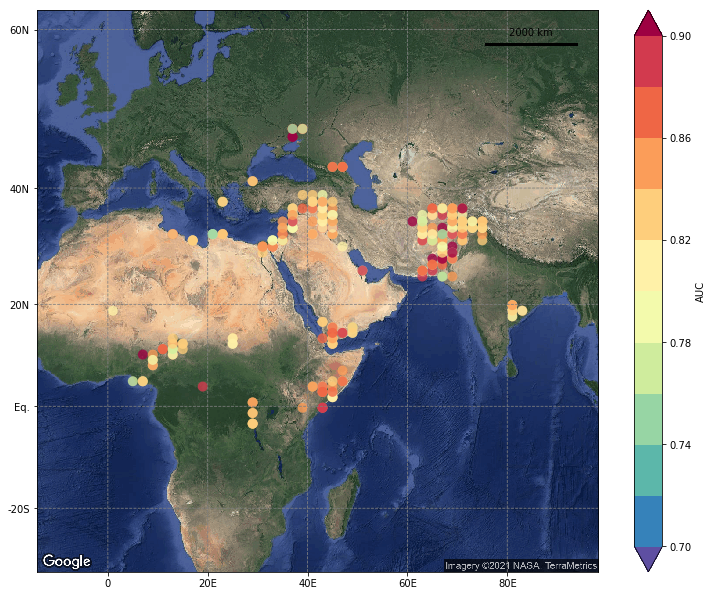

In [37]:
x_range = [df.lontgt1.min(), df.lontgt2.max()]
y_range = [df.lattgt1.min(), df.lattgt2.max()]
print(f'x range = {x_range}, y range = {y_range}')

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
g = GoogleVisibleMap(
    x=x_range, 
    y=y_range,
    scale=2,  # scale is for more details
    maptype='satellite')

ggl_img = g.get_vardata()
ax.imshow(ggl_img)

# make a map of the same size as the image (no country borders)
sm = Map(g.grid, factor=1, countries=False)
sm.set_rgb(ggl_img)  # add the background rgb image
sm.set_scale_bar(location=(0.88, 0.94))  # add scale
sm.visualize(ax=ax)  # plot it


dl = DataLevels(df['best_auc'], levels=np.arange(.7, .9, .02), extend='both', cmap='Spectral_r')
x, y = sm.grid.transform(df['lon'].values, df['lat'].values)
ax.scatter(x, y, color=dl.to_rgb(), s=100, edgecolors='w', linewidths=0, alpha=.8)
dl.append_colorbar(ax, label='AUC')

# make it nice
plt.tight_layout()
plt.show()

## Plot total kills or event frequency

For `vartgt`
- 'Bombing_Explosion-Facility_Infrastructure_Attack'
- 'Armed_Assault-Assassination-Hijacking-Hostage_Taking_Barricade_Incident-Hostage_Taking_Kidnapping'
we have frequency (`value_type` = 'freq').

For `vartgt` = 'VAR', which is number of kills, we have both frequency (if there at least one killed, $1$, and no kill, $0$) and total (`value_type` = 'total')

In [44]:
df = pd.read_csv('tile_freq_total.csv')
x_range = [df.lon1.min(), df.lon2.max()]
y_range = [df.lat1.min(), df.lat2.max()]
print(f'x range = {x_range}, y range = {y_range}')
value_type, vartgt = 'freq', 'Bombing_Explosion-Facility_Infrastructure_Attack'
df = df[ (df['type'] == value_type) & (df['vartgt'] == vartgt) ]

# colorbar value range
value_min, value_max = df['value'].min(), df['value'].max()
print(f'value [min, max] = [{value_min}, {value_max}]')
value_max = .1
levels = np.linspace(value_min, value_max, 10)

x range = [0.0, 84.0], y range = [-4.0, 49.0]
value [min, max] = [0.025192, 0.816539]


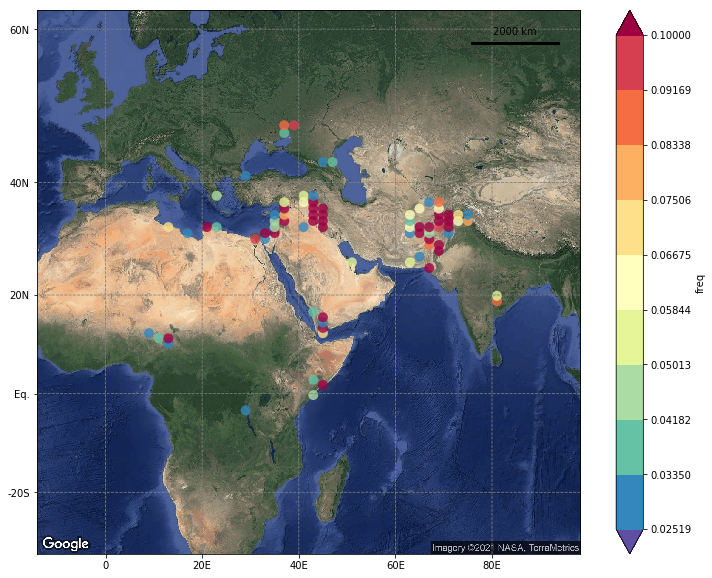

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
g = GoogleVisibleMap(
    x=x_range, 
    y=y_range,
    scale=2,  # scale is for more details
    maptype='satellite')

ggl_img = g.get_vardata()
ax.imshow(ggl_img)

# make a map of the same size as the image (no country borders)
sm = Map(g.grid, factor=1, countries=False)
sm.set_rgb(ggl_img)  # add the background rgb image
sm.set_scale_bar(location=(0.88, 0.94))  # add scale
sm.visualize(ax=ax)  # plot it

dl = DataLevels(df['value'], levels=levels, extend='both', cmap='Spectral_r')
x, y = sm.grid.transform(df['lon'].values, df['lat'].values)
ax.scatter(x, y, color=dl.to_rgb(), s=100, edgecolors='w', linewidths=0, alpha=.8)
dl.append_colorbar(ax, label=value_type)

# make it nice
plt.tight_layout()
plt.show()

## ROC

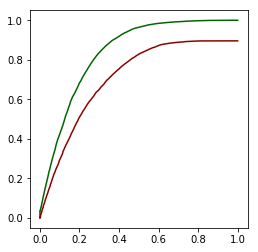

In [6]:
df_roc_compare = pd.read_csv('roc_compare.csv').set_index('x')
fig, ax = plt.subplots(1, 1)
x = df_roc_compare.index.values
y_cynet, y_rnn = df_roc_compare['cynet'].values, df_roc_compare['rnn'].values
ax.plot(x, y_cynet, color='darkgreen', label='cynet')
ax.plot(x, y_rnn, color='darkred', label='rnn')
ax.set_aspect(1)

## Get event frequency
File already generated, don't do it again.

In [31]:
# myDict = {
#     'Armed_Assault-Assassination-Hijacking-Hostage_Taking_Barricade_Incident-Hostage_Taking_Kidnapping': [],
#     'Bombing_Explosion-Facility_Infrastructure_Attack': [], 
#     'VAR': []
# }

# with open('triplet/TERROR_2012-01-01_2015-12-31.coords', 'r') as handles:
#     for line in handles:
#         line = line.strip()
#         lat1, lat2, lon1, lon2, var = line.split('#')
        
#         split_fname = glob(f'split/*{line}')[0]
#         d = np.genfromtxt(split_fname, dtype='int')
#         if var == 'VAR':
#             total = sum(d)
#             row = [float(lat1), float(lat2), float(lon1), float(lon2), var, total, 'total']
#             myDict[var].append(row)
            
#         d[d > 0] = 1
#         freq = sum(d) / len(d)
#         row = [float(lat1), float(lat2), float(lon1), float(lon2), var, freq, 'freq']
#         myDict[var].append(row)

In [34]:
# dfs = []
# for val, data in myDict.items():
#     df = pd.DataFrame(data=data, columns=['lat1', 'lat2', 'lon1', 'lon2', 'vartgt', 'value', 'type'])
#     dfs.append(df)
# df_freq = pd.concat(dfs, axis=0)
# df_freq['lat'] = (df_freq['lat1'] + df_freq['lat2']) / 2.
# df_freq['lon'] = (df_freq['lon1'] + df_freq['lon2']) / 2.
# df_freq.to_csv('tile_freq_total.csv', float_format='%.6f')